In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
large = 22
med = 16
small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
mpl.__version__, sns.__version__

('3.1.3', '0.10.1')

## Load Data

In [4]:
Midwest = pd.read_csv("https://raw.githubusercontent.com/XiaosongWen/matplotlib/master/Data/midwest_filter.csv")
Mpg = pd.read_csv("Data/mpg_ggplot2.csv")
Mtcars = pd.read_csv("Data/mtcars.csv")

# Scatter Plot

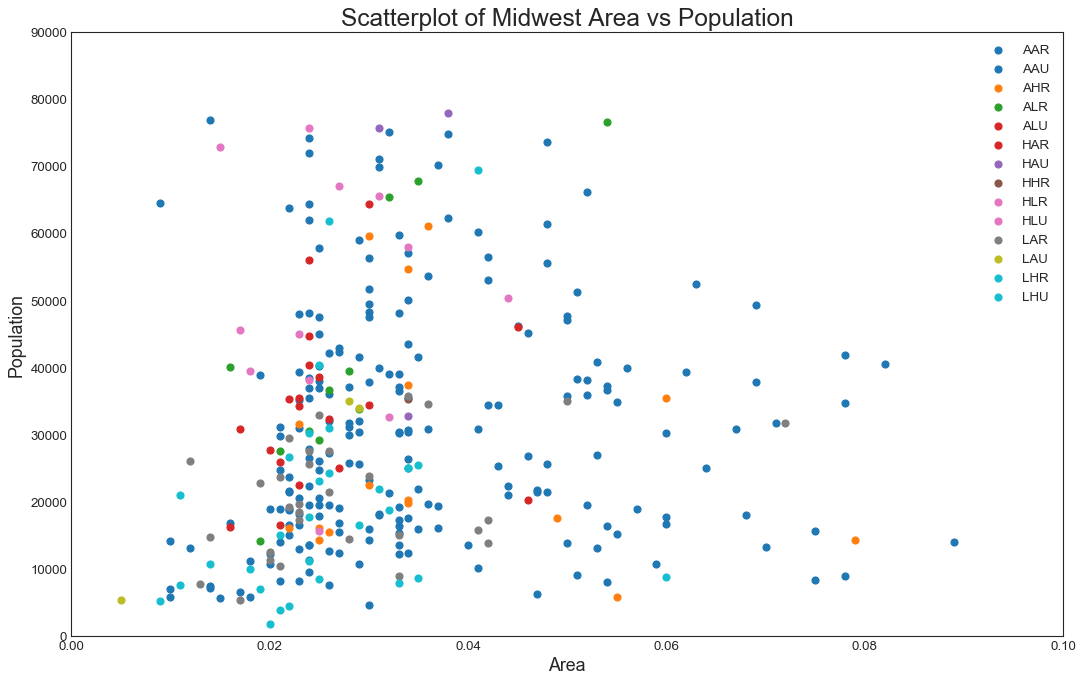

In [3]:
df =  Midwest
# prepar
categories = np.unique(df.category)
colors = np.array([plt.cm.tab10(i/float(len(categories)-1))
                   for i in range(len(categories))])
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=df.loc[df.category == category, :],
                s=40, c=colors[i].reshape(1, -1), label=str(category))
# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# Bubble plot with Encircling

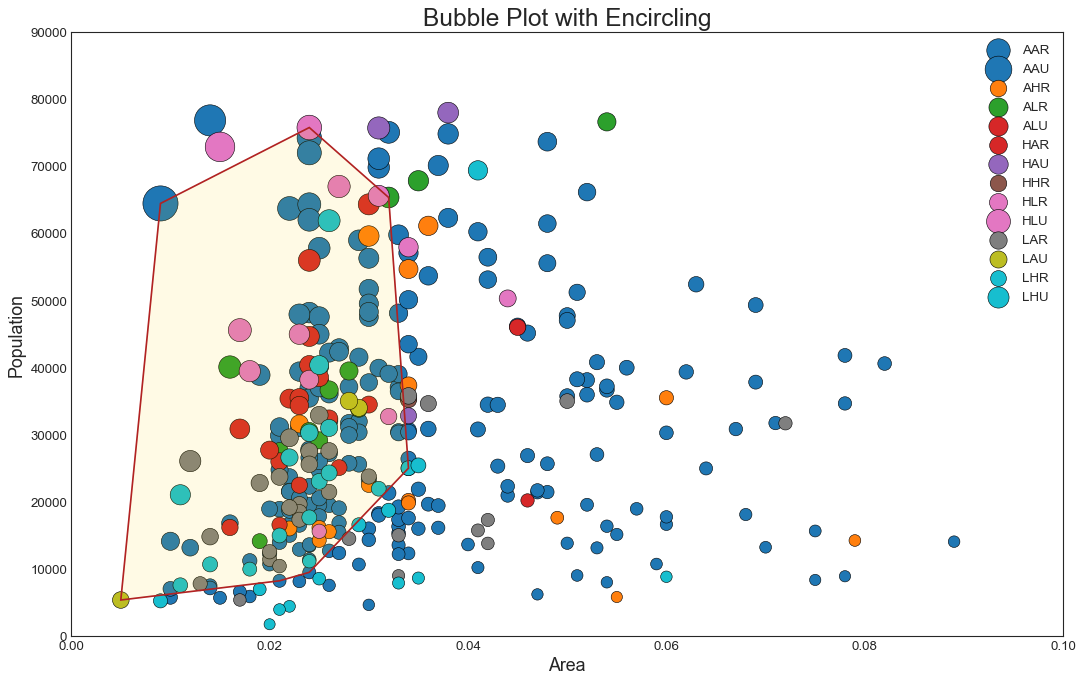

In [4]:
from matplotlib import patches
from scipy.spatial import ConvexHull

# df =  Midwest
# # prepar
# categories = np.unique(df.category)
# colors = np.array([plt.cm.tab10(i/float(len(categories)-1))
#                    for i in range(len(categories))])

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=df.loc[df.category == category, :], s='dot_size', c=colors[i].reshape(
        1, -1), label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data = df.loc[df.state == 'IN', :]

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal,
         ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal,
         ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)
plt.show()

# Scatterplot with line of best fit

Text(0.5, 1, 'Scatterplot with line of best fit')

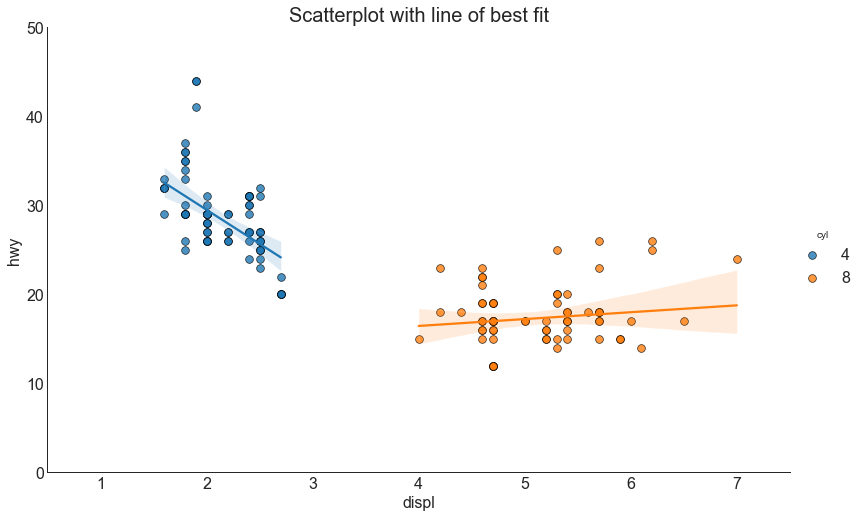

In [5]:
# Import Data
df = Mpg
df_select = df.loc[df.cyl.isin([4, 8]), :]

# Plot
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit", fontsize=20)

# Jittering 
## Jittering with stripplot

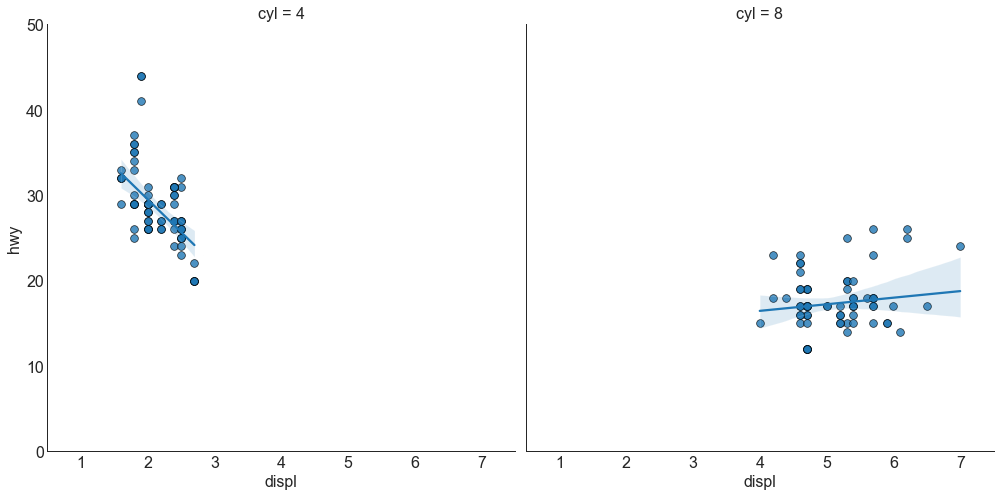

In [6]:
# Import Data
# df = Mpg
# df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
gridobj = sns.lmplot(x="displ", y="hwy",
                     data=df_select,
                     height=7,
                     robust=True,
                     palette='Set1',
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## jittered plots to avoid overlapping of points

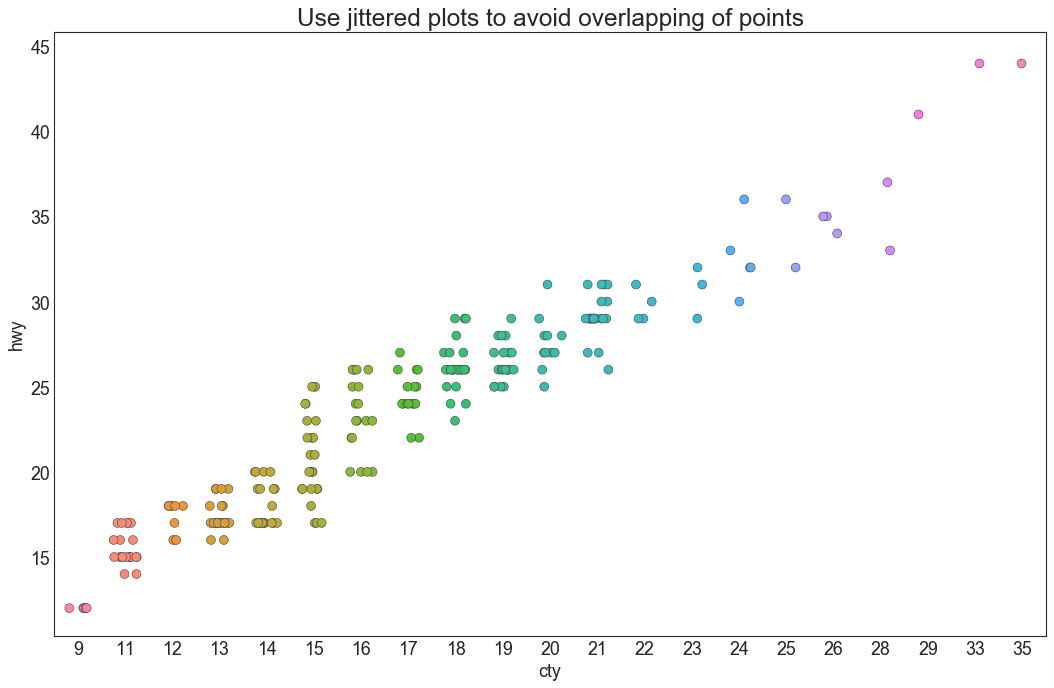

In [7]:
# Import Data
# df = Mpg

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

# Counts Plot

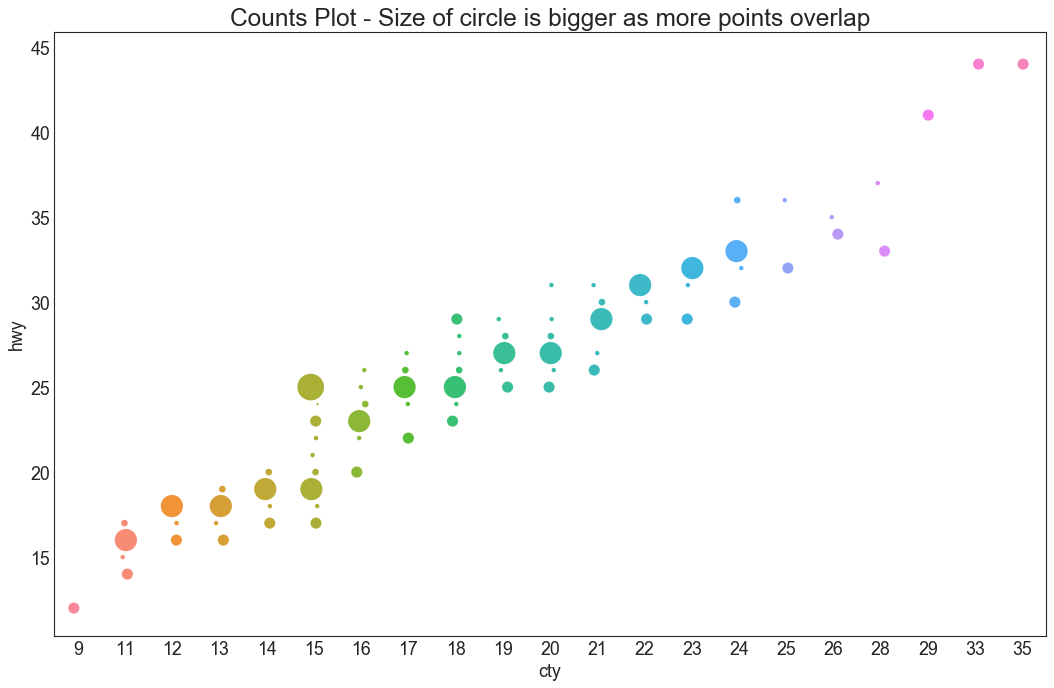

In [8]:
# Import Data
df = Mpg
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title(
    'Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

# Scatterplot with Histograms on the side

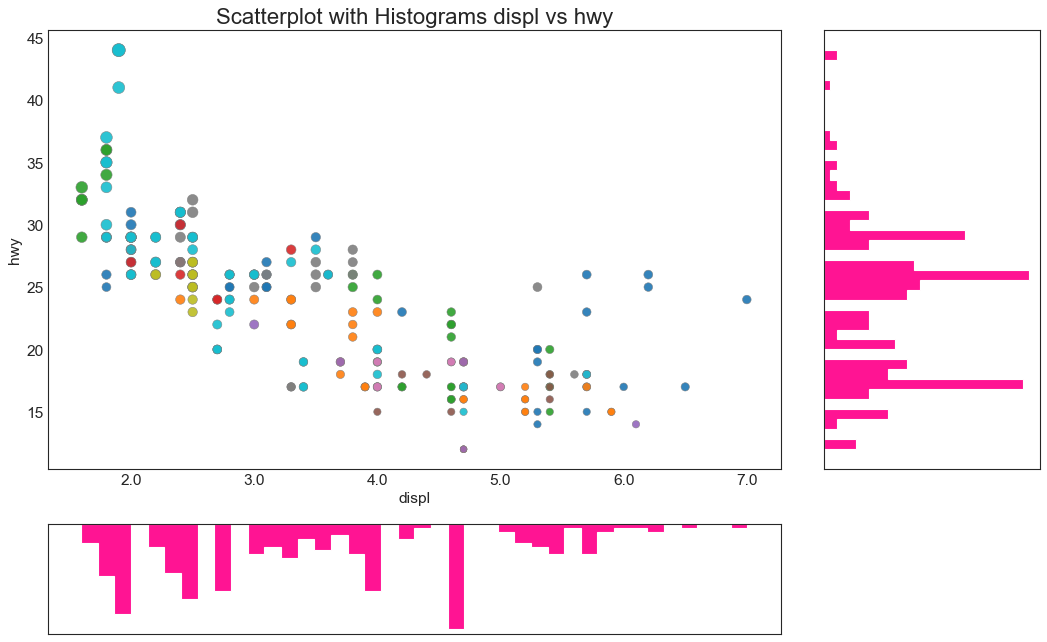

In [9]:
# Import Data
df = Mpg

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes,
                alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the bottom
ax_bottom.hist(df.displ, 40, histtype='stepfilled',
               orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the right
ax_right.hist(df.hwy, 40, histtype='stepfilled',
              orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms displ vs hwy',
            xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

# Scatterplot with Boxplot on the side

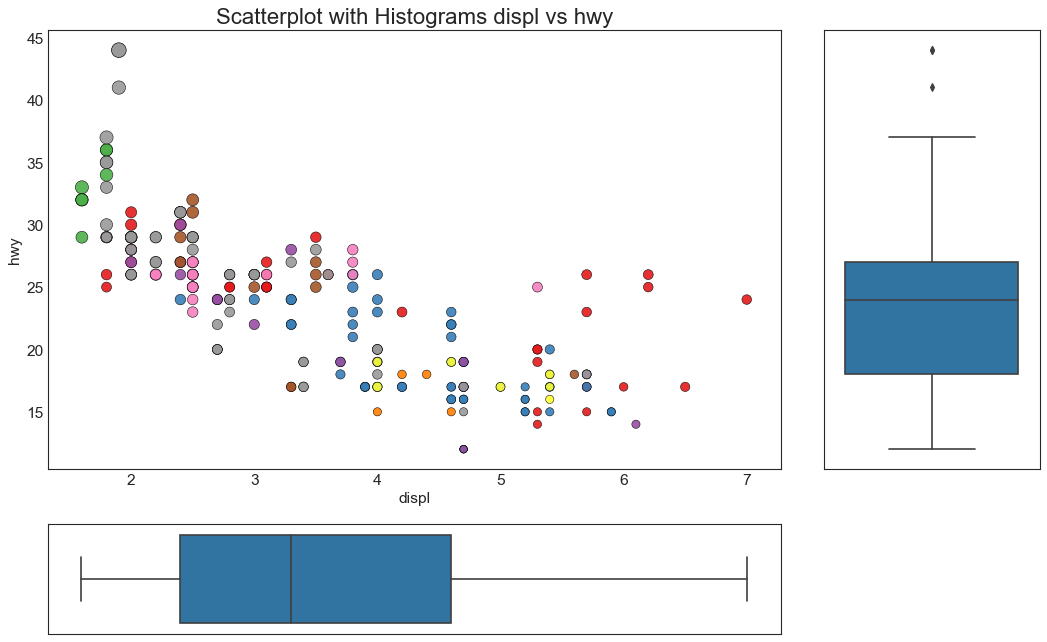

In [10]:
# Import Data
# df = Mpg

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes,
                alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms displ vs hwy',
            xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

# Correlogram 

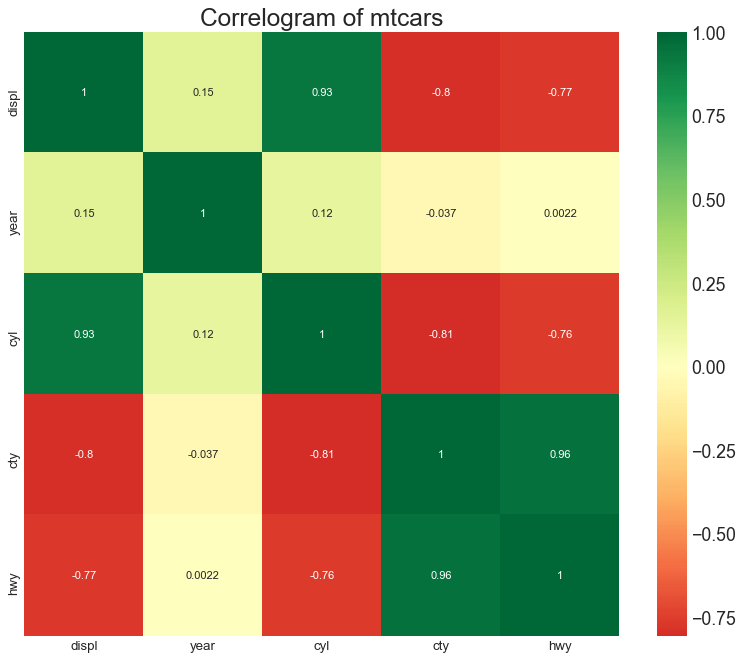

In [11]:
# Import Dataset
# df = Mtcars

# Plot
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Pairplot

<Figure size 800x640 with 0 Axes>

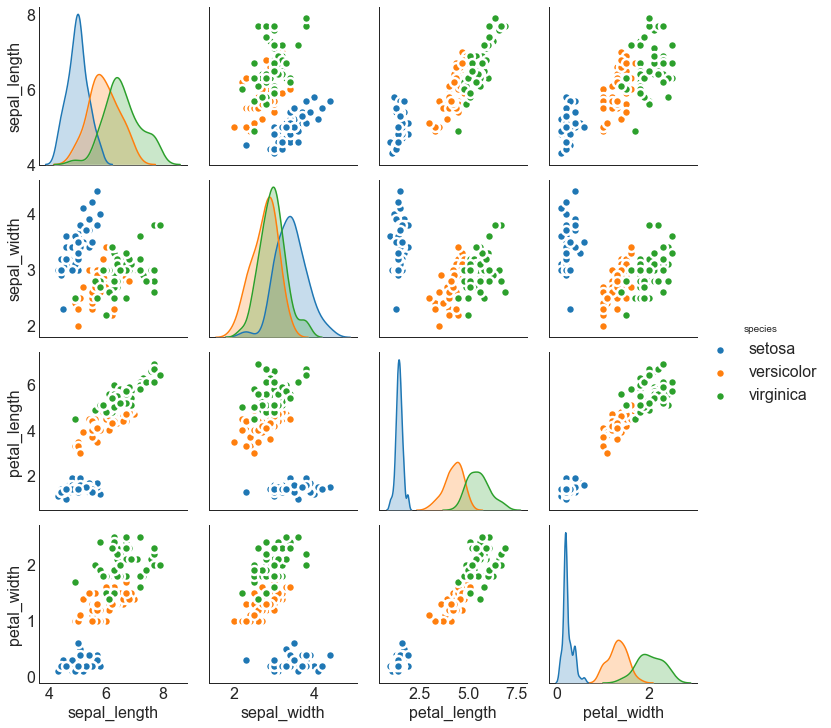

In [12]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(
    s=80, edgecolor="white", linewidth=2.5))
plt.show()

## pairplot with linear regression fitted

<Figure size 800x640 with 0 Axes>

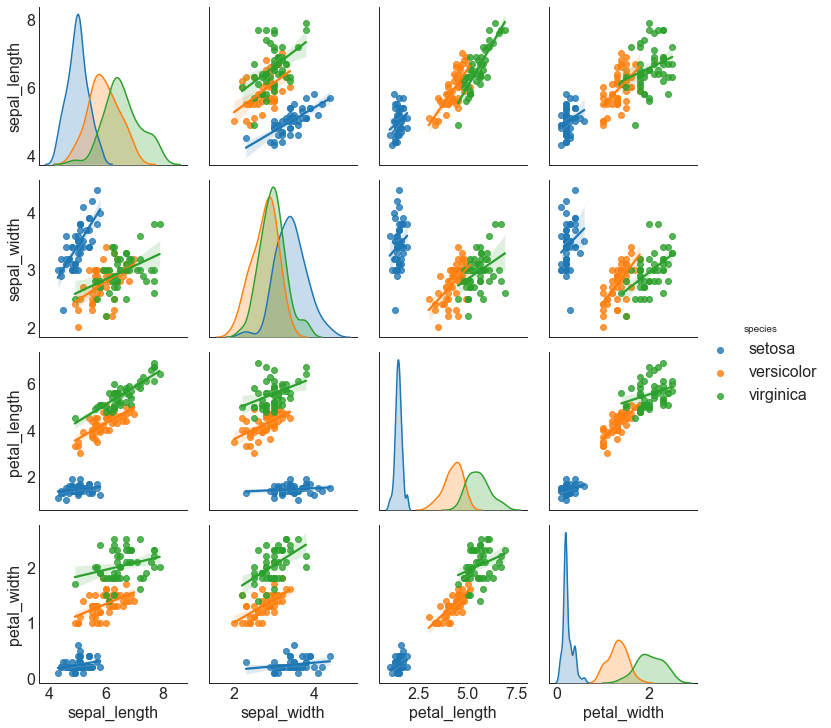

In [13]:
# Load Dataset
# df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()